In [8]:
dirmkt = read.csv("Data/Direct_Marketing.csv")

In [21]:
installed.packages("tidyverse")
library(tidyverse)

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [23]:
library(ggplot2)

In [13]:
head(dirmkt,10)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<dbl>
1,Old,Female,Own,Single,Far,47500,0,High,6,75.5
2,Middle,Male,Rent,Single,Close,63600,0,High,6,131.8
3,Young,Female,Rent,Single,Close,13500,0,Low,18,29.6
4,Middle,Male,Own,Married,Close,85600,1,High,18,243.6
5,Middle,Female,Own,Single,Close,68400,0,High,12,130.4
6,Young,Male,Own,Married,Close,30400,0,Low,6,49.5
7,Middle,Female,Rent,Single,Close,48100,0,Medium,12,78.2
8,Middle,Male,Own,Single,Close,68400,0,High,18,115.5
9,Middle,Female,Own,Married,Close,51900,3,Low,6,15.8


In [32]:
salary_spend_df = dirmkt[c("Salary","AmountSpent")]

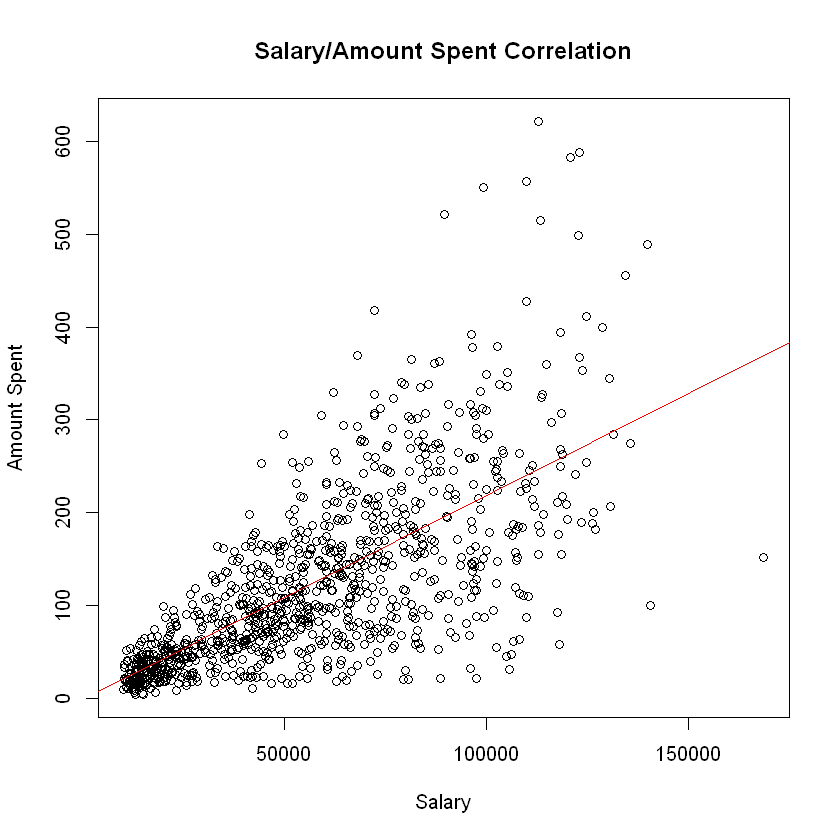

In [37]:
plot(salary_spend_df$Salary,salary_spend_df$AmountSpent,xlab = "Salary",ylab = "Amount Spent",main = "Salary/Amount Spent Correlation")
abline(lm(AmountSpent~Salary,data=salary_spend_df),col='red') 


In [27]:
lm1 <- lm(salary_spend_df$AmountSpent ~ salary_spend_df$Salary, data = salary_spend_df)
summary(lm1)


Call:
lm(formula = salary_spend_df$AmountSpent ~ salary_spend_df$Salary, 
    data = salary_spend_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-217.97  -31.52   -5.35   27.97  375.29 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.531783   4.537416  -0.338    0.736    
salary_spend_df$Salary  0.002196   0.000071  30.930   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.71 on 998 degrees of freedom
Multiple R-squared:  0.4894,	Adjusted R-squared:  0.4889 
F-statistic: 956.7 on 1 and 998 DF,  p-value: < 2.2e-16


In [38]:
install.packages("fastDummies")

Installing package into 'C:/Users/Will/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Will\AppData\Local\Temp\Rtmp4aYoeW\downloaded_packages


In [39]:
library(fastDummies)

Warning message:
"package 'fastDummies' was built under R version 4.3.3"


In [55]:
dirmkt = dummy_cols(dirmkt,select_columns = c("Age","Location"))

In [56]:
head(dirmkt)
#tells you the scheme used
#contrasts(dirmkt$Gender)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Location_Close,Location_Far
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,Old,Female,Own,Single,Far,47500,0,High,6,75.5,0,1,0,0,1
2,Middle,Male,Rent,Single,Close,63600,0,High,6,131.8,1,0,0,1,0
3,Young,Female,Rent,Single,Close,13500,0,Low,18,29.6,0,0,1,1,0
4,Middle,Male,Own,Married,Close,85600,1,High,18,243.6,1,0,0,1,0
5,Middle,Female,Own,Single,Close,68400,0,High,12,130.4,1,0,0,1,0
6,Young,Male,Own,Married,Close,30400,0,Low,6,49.5,0,0,1,1,0


In [48]:
indicator_lm = lm(AmountSpent ~ Age_Middle+Age_Old,data=dirmkt)
summary(indicator_lm)


Call:
lm(formula = AmountSpent ~ Age_Middle + Age_Old, data = dirmkt)

Residuals:
    Min      1Q  Median      3Q     Max 
-136.71  -54.61  -15.21   39.06  478.49 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   55.862      5.112   10.93   <2e-16 ***
Age_Middle    94.307      6.395   14.75   <2e-16 ***
Age_Old       87.350      7.919   11.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 86.6 on 997 degrees of freedom
Multiple R-squared:  0.1897,	Adjusted R-squared:  0.1881 
F-statistic: 116.7 on 2 and 997 DF,  p-value: < 2.2e-16


In [54]:
indicator_salary_lm = lm(AmountSpent ~ Age_Middle+Age_Old+Salary,data=dirmkt)
summary(indicator_salary_lm)


Call:
lm(formula = AmountSpent ~ Age_Middle + Age_Old + Salary, data = dirmkt)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.45  -34.74   -5.08   27.82  352.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.118e+00  4.715e+00  -1.298 0.194673    
Age_Middle  -4.808e+00  6.394e+00  -0.752 0.452290    
Age_Old      2.328e+01  6.720e+00   3.464 0.000554 ***
Salary       2.236e-03  8.949e-05  24.991  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67.92 on 996 degrees of freedom
Multiple R-squared:  0.502,	Adjusted R-squared:  0.5005 
F-statistic: 334.7 on 3 and 996 DF,  p-value: < 2.2e-16


In [57]:
location_salary_lm = lm(AmountSpent ~ Location_Far+Salary,data=dirmkt)
summary(location_salary_lm)


Call:
lm(formula = AmountSpent ~ Location_Far + Salary, data = dirmkt)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.50  -37.45   -0.65   26.17  331.52 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.048e+01  4.413e+00  -4.641 3.93e-06 ***
Location_Far  5.906e+01  4.414e+00  13.380  < 2e-16 ***
Salary        2.229e-03  6.545e-05  34.050  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63.29 on 997 degrees of freedom
Multiple R-squared:  0.5672,	Adjusted R-squared:  0.5663 
F-statistic: 653.2 on 2 and 997 DF,  p-value: < 2.2e-16


In [59]:
dirmkt$SalaryFar = dirmkt$Salary * dirmkt$Location_Far

In [60]:
location_salary__interaction_lm = lm(AmountSpent ~ Location_Far+Salary+SalaryFar,data=dirmkt)
summary(location_salary__interaction_lm)


Call:
lm(formula = AmountSpent ~ Location_Far + Salary + SalaryFar, 
    data = dirmkt)

Residuals:
     Min       1Q   Median       3Q      Max 
-177.242  -31.231   -4.278   24.047  276.980 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.448e+00  4.808e+00   0.301    0.763    
Location_Far -1.346e+01  8.680e+00  -1.550    0.121    
Salary        1.843e-03  7.453e-05  24.723   <2e-16 ***
SalaryFar     1.317e-03  1.377e-04   9.565   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.6 on 996 degrees of freedom
Multiple R-squared:  0.6036,	Adjusted R-squared:  0.6024 
F-statistic: 505.5 on 3 and 996 DF,  p-value: < 2.2e-16
